In [49]:
df3=pd.read_csv('health_insurance.csv')
df3.head(3)

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.90,157,0,southwest,smoker,16884.9240
1,20,F,36.77,160,1,southeast,non-smoker,1725.5523
2,33,F,35.00,145,3,southeast,non-smoker,4449.4620


In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['new_col']= le.fit_transform(df2['smoker'])
df2['new_col'].head(2)

0    1
1    0
Name: new_col, dtype: int32

In [51]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['smoker','non-smoker']])
df2['new_col']=oe.fit_transform(df2[['smoker']])
df2['new_col'].head(2)

0    0.0
1    1.0
Name: new_col, dtype: float64

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import variation

#### Load the health insurance dataset and check the first five observations

In [5]:
pd.set_option('display.max_rows',None)
df1=pd.read_csv('health_insurance.csv')


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='bmi'>

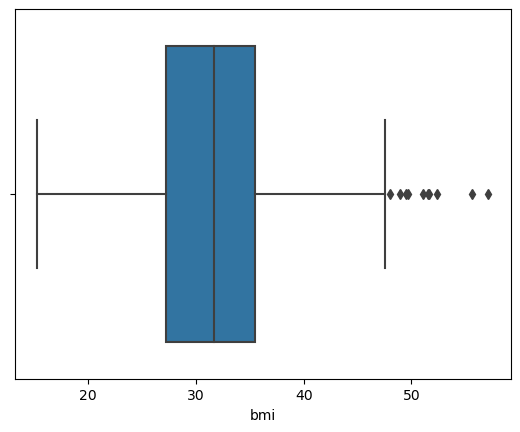

In [3]:
sns.boxplot(df1['bmi'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

0.04359793424360781


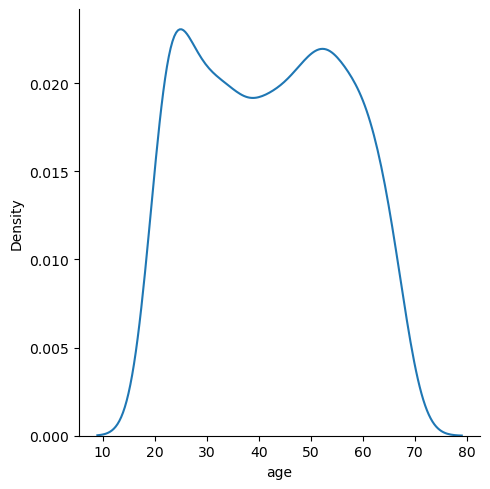

In [4]:
print(df1['age'].skew())
sns.displot(df1['age'],kind='kde')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df1[df1['medical_cost']<=25000].shape[0]

1108

In [6]:
df1[df1['medical_cost']<=25000].shape[0]/df1['medical_cost'].shape[0]

0.8523076923076923

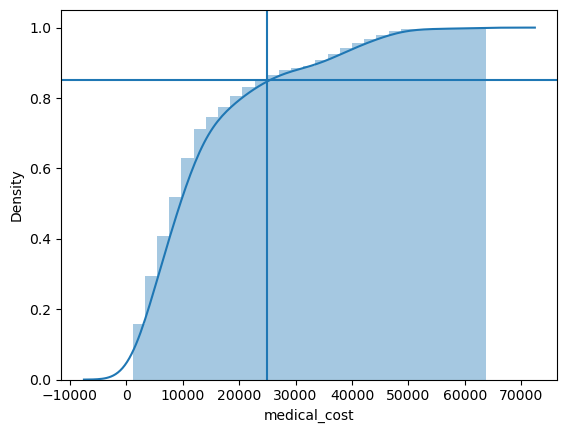

In [7]:
sns.distplot(df1['medical_cost'],hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))
plt.axvline(25000)
plt.axhline(0.8523076923076923)             

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

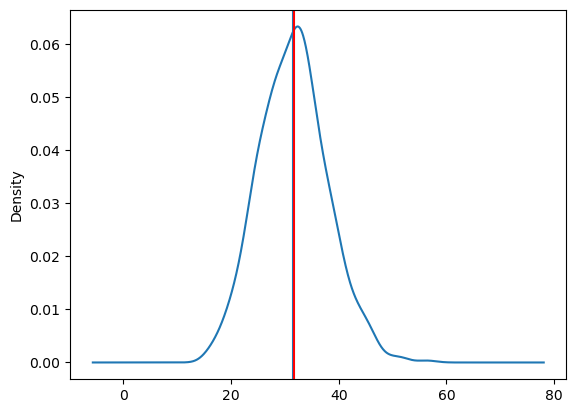

In [8]:
df1['bmi'].plot(kind='kde')
plt.axvline(df1['bmi'].mean())
plt.axvline(df1['bmi'].median(),color='red')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost'>

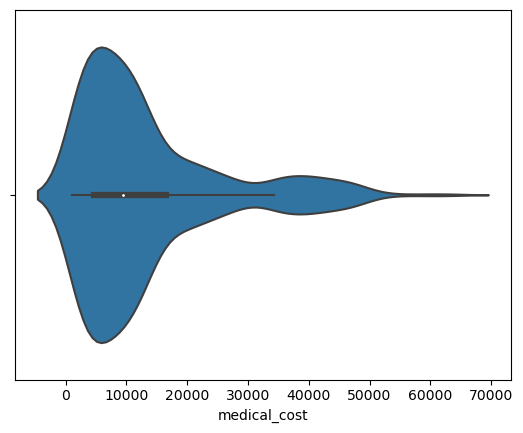

In [9]:
sns.violinplot(df1['medical_cost'])

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df1[(df1['age']<30) & (df1['medical_cost']>40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='bmi', ylabel='medical_cost'>

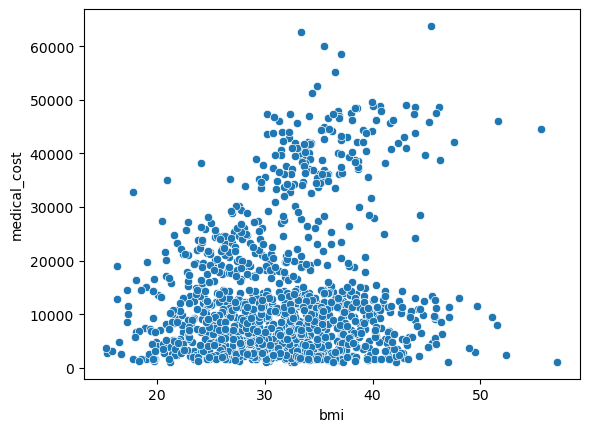

In [11]:
sns.scatterplot(df1['bmi'],df1['medical_cost'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
avg_bmi=df1.groupby(by='gender')['bmi'].mean()
std_bmi=df1.groupby(by='gender')['bmi'].std()
std_bmi/avg_bmi*100

gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df1.groupby(by='region')['gender'].value_counts()

region     gender
northeast  F         174
           M         141
northwest  M         166
           F         149
southeast  F         178
           M         178
southwest  M         158
           F         156
Name: gender, dtype: int64

In [14]:
df1[df1['gender']=='M']['region'].value_counts().head(1)

southeast    178
Name: region, dtype: int64

<AxesSubplot:xlabel='region,gender'>

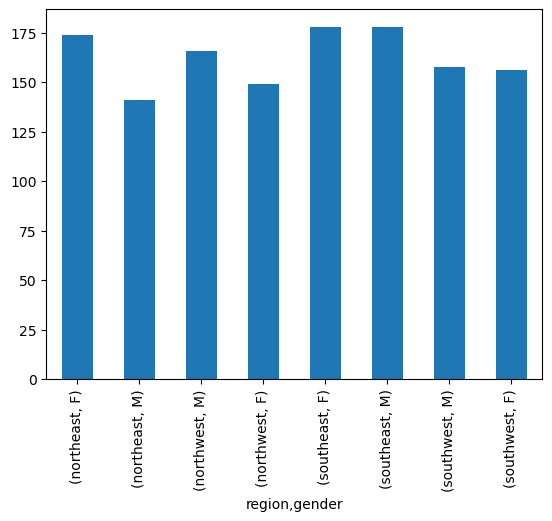

In [15]:
df1.groupby(by='region')['gender'].value_counts().plot(kind='bar')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

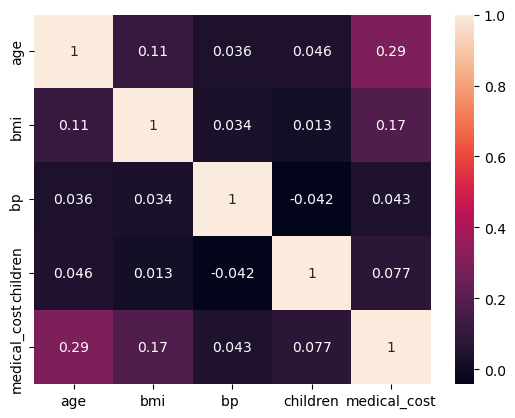

In [16]:
sns.heatmap(df1.corr(),annot=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='smoker', ylabel='medical_cost'>

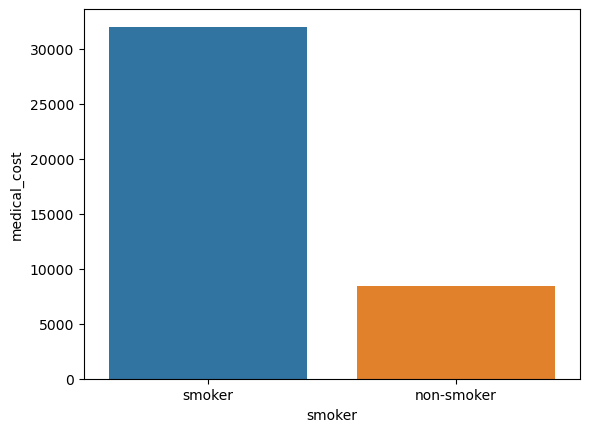

In [17]:
sns.barplot(x='smoker',y='medical_cost',data=df1,ci=False)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost', ylabel='age'>

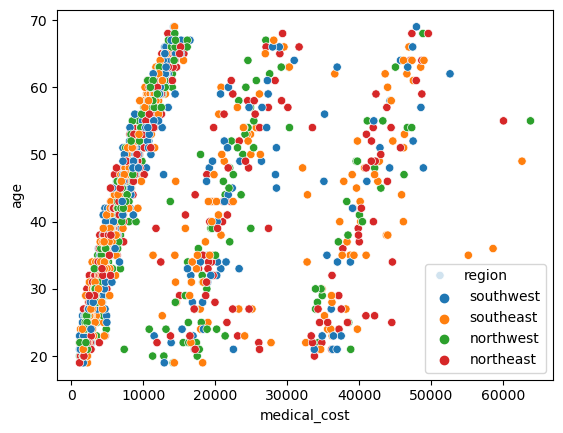

In [18]:
sns.scatterplot(x='medical_cost',y='age',hue='region',data=df1,ci=False)

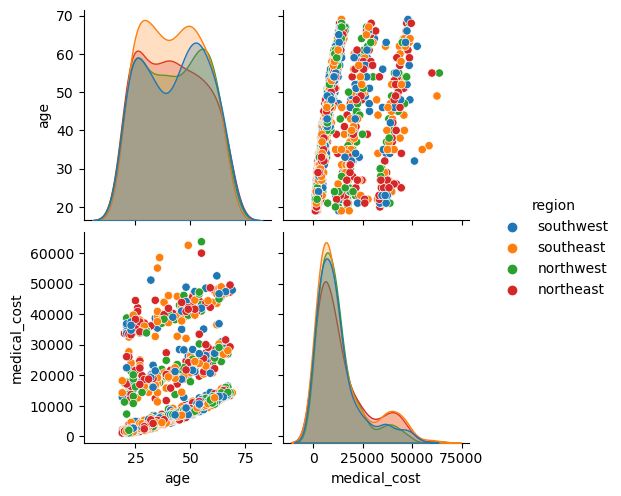

In [19]:
sns.pairplot(data=df1[['age','medical_cost','region']],hue='region')

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df2=pd.get_dummies(df1['region'])

In [17]:
pd.concat([df1,df2],axis=1)

,age,gender,bmi,bp,children,region,smoker,medical_cost,northeast,northwest,southeast,southwest
0,23,M,31.900,157,0,southwest,smoker,16884.924000,0,0,0,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.552300,0,0,1,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.462000,0,0,1,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.470610,0,1,0,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.855200,0,1,0,0
5,33,M,25.740,152,0,southeast,non-smoker,3756.621600,0,0,1,0
6,48,M,31.440,150,1,southeast,non-smoker,8240.589600,0,0,1,0
7,26,F,21.845,140,0,northwest,non-smoker,2395.171550,0,1,0,0
8,36,M,31.920,137,1,northeast,smoker,37701.876800,1,0,0,0
9,60,M,27.720,142,3,northwest,non-smoker,14001.133800,0,1,0,0


In [20]:
pd.concat([df1,pd.get_dummies(df1['region'])],axis=1)


,age,gender,bmi,bp,children,region,smoker,medical_cost,northeast,northwest,southeast,southwest
0,23,M,31.900,157,0,southwest,smoker,16884.92400,0,0,0,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0,1,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0,1,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,1,0,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830,0,0,0,1
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080,1,0,0,0
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350,0,0,1,0
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500,0,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# from sklearn.preprocessing import LabelEncoder
# LabelEncoder().fit_transform(df1['smoker'])

In [21]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df1['smoker_le']=le.fit_transform(df1['smoker'])
df1.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_le
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
df1['gender_map']=df1['gender'].map(df1['gender'].value_counts(normalize=True))
df1.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,gender_map
0,23,M,31.900,157,0,southwest,smoker,16884.92400,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0.505385


In [26]:
freq=df1.groupby(by='gender').size()/len(df1)
df1['gender_map_2']=df1['gender'].map(freq)
df1
df1.drop(columns='gender_map_2')


,age,gender,bmi,bp,children,region,smoker,medical_cost,gender_map,smoker_oe
0,23,M,31.900,157,0,southwest,smoker,16884.924000,0.494615,1.0
1,20,F,36.770,160,1,southeast,non-smoker,1725.552300,0.505385,0.0
2,33,F,35.000,145,3,southeast,non-smoker,4449.462000,0.505385,0.0
3,37,F,23.705,153,0,northwest,non-smoker,21984.470610,0.505385,0.0
4,36,F,27.880,156,0,northwest,non-smoker,3866.855200,0.505385,0.0
5,33,M,25.740,152,0,southeast,non-smoker,3756.621600,0.494615,0.0
6,48,M,31.440,150,1,southeast,non-smoker,8240.589600,0.494615,0.0
7,26,F,21.845,140,0,northwest,non-smoker,2395.171550,0.505385,0.0
8,36,M,31.920,137,1,northeast,smoker,37701.876800,0.494615,1.0
9,60,M,27.720,142,3,northwest,non-smoker,14001.133800,0.494615,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [24]:

oe=OrdinalEncoder(categories=[['non-smoker','smoker']])

df1['smoker_oe']=oe.fit_transform(df1[['smoker']])

In [25]:
df1.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_le,gender_map,smoker_oe
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,1.0
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,0.0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,0.0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,0.0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,0.0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# zscore - representing a column in zscale (mean=0,std=1)
# to cal zscore- (xi-mean(x))/std

In [27]:
df1['zscore']=(df1['bmi']-(df1['bmi'].mean()))/df1['bmi'].std()
df1['zscore']

0       0.050123
1       0.816269
2       0.537813
3      -1.239111
4      -0.582302
          ...   
1295   -0.096185
1296    0.525228
1297    0.514215
1298   -1.066847
1299    0.234187
Name: zscore, Length: 1300, dtype: float64

In [28]:
ss=StandardScaler()
df1['bmi_ss']=ss.fit_transform(df1[['bmi']]) 
df1['bmi_ss']

0       0.050142
1       0.816583
2       0.538020
3      -1.239588
4      -0.582526
          ...   
1295   -0.096222
1296    0.525430
1297    0.514413
1298   -1.067257
1299    0.234277
Name: bmi_ss, Length: 1300, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
df1['age_mm_for']=(df1['age']-df1['age'].min())/(df1['age'].max()-df1['age'].min())
df1['age_mm_for']

0       0.08
1       0.02
2       0.28
3       0.36
4       0.34
        ... 
1295    0.70
1296    0.06
1297    0.04
1298    0.06
1299    0.88
Name: age_mm_for, Length: 1300, dtype: float64

In [30]:
# or
mm=MinMaxScaler()
df1['age_MM']=mm.fit_transform(df1[['age']])
df1['age_MM']

0       0.08
1       0.02
2       0.28
3       0.36
4       0.34
        ... 
1295    0.70
1296    0.06
1297    0.04
1298    0.06
1299    0.88
Name: age_MM, Length: 1300, dtype: float64

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
import scipy.stats as sts
sts.boxcox(df1['medical_cost'])

(array([12.21172826,  8.85385481, 10.20669263, ...,  8.77417393,
         9.06646625, 13.06750186]),
 0.044952630049998006)

In [31]:
pt=PowerTransformer(method='box-cox',standardize=False)
df1['medical_cost_bc']=pt.fit_transform(df1[['medical_cost']])
df1['medical_cost_bc']

0       12.211728
1        8.853855
2       10.206693
3       12.622954
4       10.002604
          ...    
1295    11.498161
1296     9.199142
1297     8.774174
1298     9.066466
1299    13.067502
Name: medical_cost_bc, Length: 1300, dtype: float64

In [32]:
df1['medical_cost_log']=np.log(df1['medical_cost'])

In [33]:
df1[['medical_cost','medical_cost_log','medical_cost_bc']].skew()

medical_cost        1.534185
medical_cost_log   -0.093315
medical_cost_bc    -0.008662
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [34]:
df1['medical_cost_exp']=np.exp(df1['medical_cost_log'])

In [35]:
df1[['medical_cost','medical_cost_log','medical_cost_exp']].skew()

medical_cost        1.534185
medical_cost_log   -0.093315
medical_cost_exp    1.534185
dtype: float64